In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import FancyArrowPatch
from scipy.interpolate import interp1d
from matplotlib.ticker import FixedLocator
from Script.path import *

In [2]:
data_dir = './Data/data_cn/'
rundata_dir = './Data/rundata_cn/'
df=pd.read_csv(data_dir+"experiment_index.csv", index_col=0)
df = df.sort_values(by='yield')
df.reset_index(drop=True, inplace=True)
df['entry'] = df.index
df.set_index('entry', inplace=True)
ar_ha_smi=df['Aryl_halide_SMILES'].tolist()
add_smi=df['Additive_SMILES'].tolist()
base_smi=df['Base_SMILES'].tolist()
ligand_smi=df['Ligand_SMILES'].tolist()
yield_value=np.array(df['yield'].tolist())

ar_ha_smi_set = sorted(list(set(ar_ha_smi)))
add_smi_set = sorted(list(set(add_smi)))
base_smi_set = sorted(list(set(base_smi)))
ligand_smi_set = sorted(list(set(ligand_smi)))

In [3]:
sorted_ar_ha = get_sort_smi(ar_ha_smi,ar_ha_smi_set,yield_value)
sorted_add = get_sort_smi(add_smi,add_smi_set,yield_value)
sorted_base = get_sort_smi(base_smi,base_smi_set,yield_value)
sorted_ligand = get_sort_smi(ligand_smi,ligand_smi_set,yield_value)

re_target_dict = {}
for i in range(len(ar_ha_smi)):
    re_target_dict[ar_ha_smi[i],ligand_smi[i],add_smi[i],base_smi[i]]=yield_value[i]

re_smi=[]
for i in sorted_ar_ha:
    for j in sorted_ligand:
        re_smi.append([i,j])
con_smi=[]
for i in sorted_add:
    for j in sorted_base:
        con_smi.append([i,j])
x=[]
y=[]        
hf_target=[]
space=[]
for index1,i in enumerate(re_smi):
    for index2,j in enumerate(con_smi):
        x.append(index1)
        y.append(index2)
        try:
            hf_target.append(re_target_dict[(i[0],i[1],j[0],j[1])])  
        except: 
            hf_target.append(0)
        space.append([i[0],i[1],j[0],j[1]])
hf_target=np.array(hf_target).reshape(len(re_smi),len(con_smi))
space = np.array(space).reshape(len(re_smi),len(con_smi),-1)

In [4]:
sorted_matrix, row_indices, col_indices = sort_2d_array(np.mean(hf_target,axis = 1),np.mean(hf_target,axis = 0),hf_target)
hf_target_sorted = hf_target[row_indices, :][:, col_indices]
space_sorted = space[row_indices, :][:, col_indices]

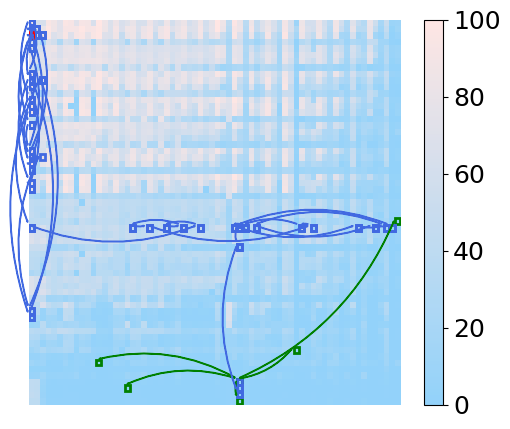

In [5]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names

cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 
all_exp_our = np.load('./results/index_Topk_dft_automl_97.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='g', linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor='g', linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c='g',ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        if m<5:
            c1='g'
            c2='g' 
        elif 4<m<10:
            c1='royalblue'
            c2='royalblue'
        elif 9<m<35:
            c1='royalblue'
            c2='royalblue'
        elif 34<m<50:
            c1='royalblue'
            c2='royalblue'
        elif m==np.argmax(all_exp_our[0,:,4]):
            c1='royalblue'
            c2='r'
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

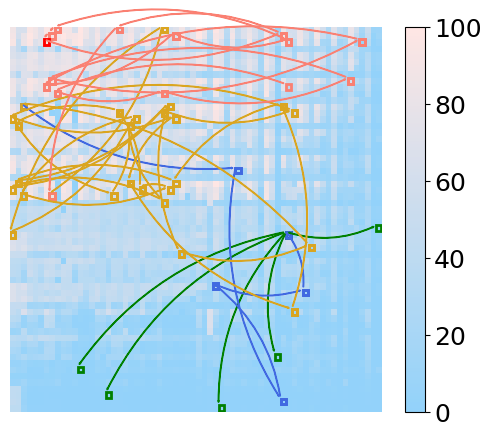

In [6]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 


all_exp_our = np.load('./results/index_ourwork-50-20_dft_automl_97.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='g', linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor='g', linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c='g',ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)    
        if m<5:
            c1='g'
            c2='g'
        elif 4<m<10:
            c1='royalblue'
            c2='royalblue'
        elif 9<m<35:
            c1='goldenrod'
            c2='goldenrod'
        elif 34<m<50:
            c1='salmon'
            c2='salmon'
        elif m==max_index:
            c1='salmon'
            c2='r'
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()